In [ ]:
# Linear Regression problem

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [19]:
ds=pd.read_csv('Advertising.csv')
ds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
df=pd.DataFrame(ds)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [22]:
df.keys()

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [23]:
df.sample(3)

,TV,radio,newspaper,sales
123,123.1,34.6,12.4,15.2
150,280.7,13.9,37.0,16.1
157,149.8,1.3,24.3,10.1


In [24]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

#checking null values in dataset

In [25]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

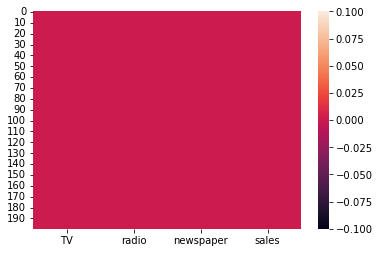

In [26]:
sns.heatmap(df.isnull())

In [22]:
# This dataset has no null values: so we can procedd further
# we have to predict the Sales made by Tv, Radio and newspaper


In [27]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [28]:
df.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [29]:
df.sales.value_counts

<bound method IndexOpsMixin.value_counts of 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64>

In [30]:
df.drop_duplicates()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [31]:
df.shape

(200, 4)

# Data Aanlysis/Visualisation

In [32]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

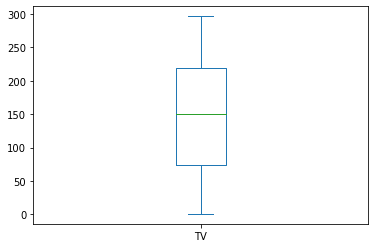

In [33]:
df['TV'].plot.box()

<AxesSubplot:>

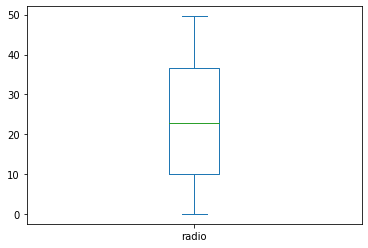

In [34]:
df['radio'].plot.box()

<AxesSubplot:>

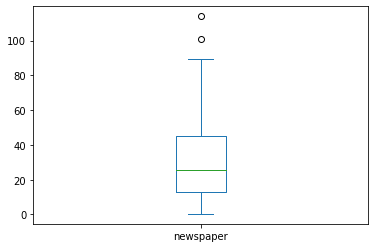

In [35]:
df['newspaper'].plot.box()

<AxesSubplot:>

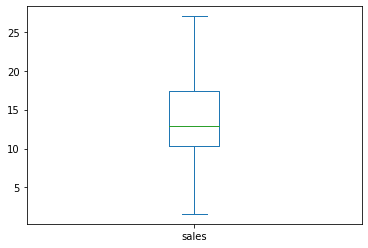

In [36]:
df['sales'].plot.box()

TV              AxesSubplot(0.125,0.536818;0.110714x0.343182)
radio        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
newspaper    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
sales        AxesSubplot(0.523571,0.536818;0.110714x0.343182)
dtype: object

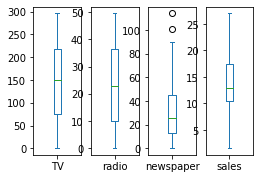

In [37]:
df.plot(kind='box', subplots=True, layout=(2,6), figsize=(6,6))

<function matplotlib.pyplot.show(close=None, block=None)>

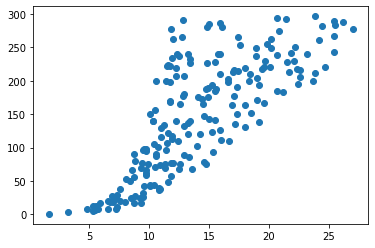

In [85]:
# Bivariate analysis

plt.scatter(df['sales'], df['TV'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

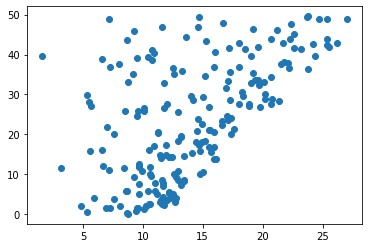

In [86]:
plt.scatter(df['sales'], df['radio'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

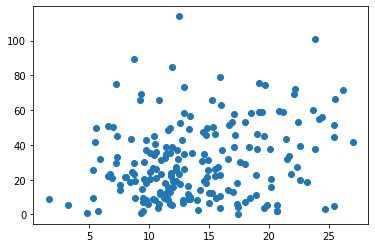

In [87]:
plt.scatter(df['sales'], df['newspaper'])
plt.show

In [43]:
# there are no categorical variables are avialable

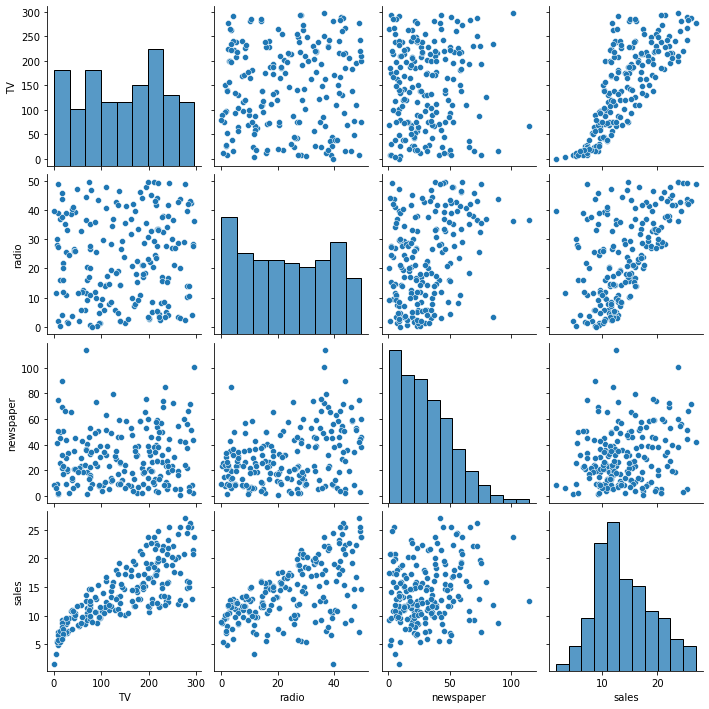

In [38]:
sns.pairplot(df)

In [45]:
# observation: there are no /  very little otliers present in this dataset

In [88]:
# removing the outliers using zscore

In [66]:
from scipy.stats import zscore

In [67]:
zscore(df)

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [69]:
thershold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [68]:
import numpy as np
z=np.abs(zscore(ds))
z.shape

(200, 4)

In [70]:
# total rows of dataloss

len(np.where(z>3)[0])

2

In [71]:
df_new=ds[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [72]:
print('Old Dataframe', df.shape)
print('New datagrame', df_new.shape)
print('Total_Dropped_rows', df.shape[0] - df_new.shape[0])

Old Dataframe (200, 4)
New datagrame (198, 4)
Total_Dropped_rows 2


In [73]:
df.shape

(200, 4)

In [74]:
df_new.shape

(198, 4)

In [ ]:
# Observation :only 2 rows has been deleted from the dataset

# check correlation

In [79]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [80]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

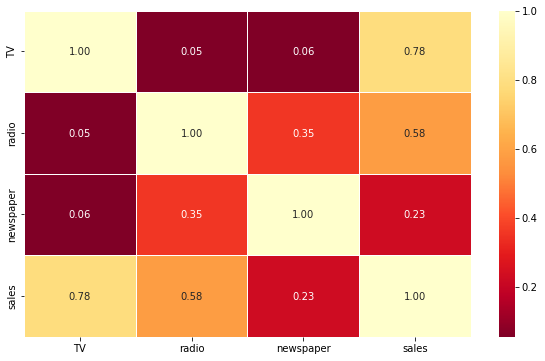

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap= 'YlOrRd_r', linewidth=0.5, annot=True, fmt='.2f')

In [51]:
# radio and newspaper has negative correlation with sales
# tv is highly correlated with sales

# summary statistics

In [82]:
df.describe()
round(df.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
TV,147.04,85.85,0.7,74.38,149.75,218.82,296.4
radio,23.26,14.85,0.0,9.98,22.90,36.52,49.6
newspaper,30.55,21.78,0.3,12.75,25.75,45.10,114.0
sales,14.02,5.22,1.6,10.38,12.90,17.40,27.0


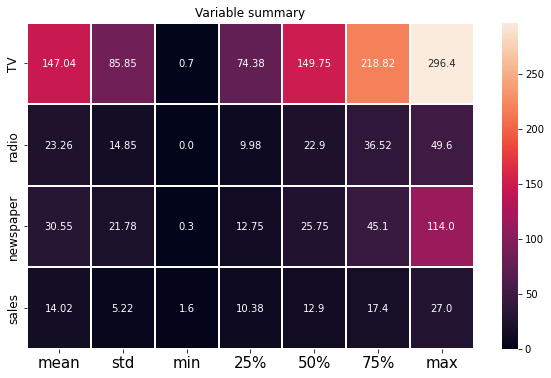

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title('Variable summary')
plt.show()


oservations from the above describe heatmap


1.Tv: 
mean-147.04
std-85.85
min-0.7
max-296.4

2.radio:
mean-23.06
std-14.85
min-0.0
max-49.6

3.newspaper:
mean-30.55
std-21.78
min-0.3
max-114.0

4.sales:
mean-14.02
std-5.22
min-1.6
max-27.0


# check skewness

In [84]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [58]:
# Normal distribution curve

<AxesSubplot:xlabel='TV', ylabel='Density'>

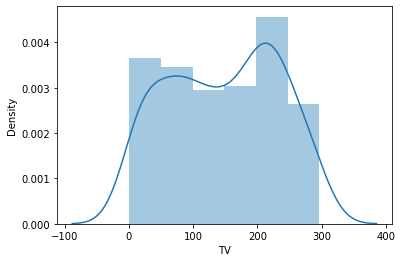

In [46]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

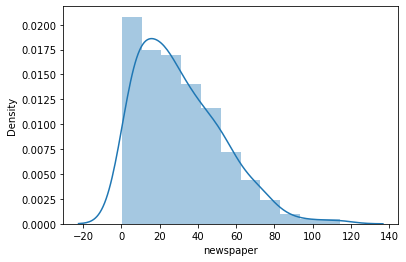

In [47]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

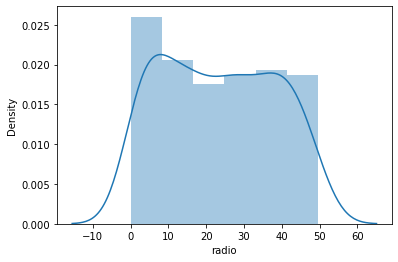

In [48]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

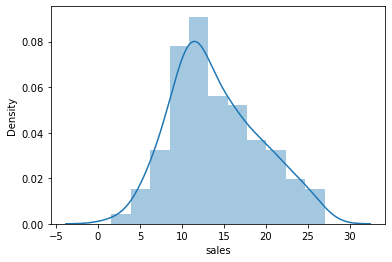

In [49]:
sns.distplot(df['sales'])

 The above dataset has skewness present
 to remove the skewness first we have to seperate the variables from target cloumn

# seperate the data x and y 

In [54]:
# independent variables

x=df.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [56]:
# target column

y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Balance the data by Removing skewness

In [57]:
import sklearn
from sklearn.preprocessing import power_transform

In [58]:
x=power_transform(x)

In [59]:
type(x)

numpy.ndarray

In [60]:
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [61]:
# checking dimensions

x.ndim

2

In [62]:
x.mean()

7.697546304067752e-17

In [63]:
x.std()

1.0

std =1.0 means data is standardised

In [64]:
df.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

# since the data had continuous values we will use Linear regression

In [104]:
x=df_new.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [105]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# split the dataset

In [106]:
x.shape

(198, 3)

In [107]:
y.shape

(198,)

In [108]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.22, random_state=42)

In [109]:
x_train.shape

(154, 3)

In [110]:
y_train.shape

(154,)

In [111]:
x_test.shape

(44, 3)

In [112]:
y_test.shape

(44,)

# Linear Regression

In [114]:
lm= LinearRegression()

In [115]:
lm.fit(x_train,y_train)

LinearRegression()

In [116]:
lm.coef_

array([0.04451279, 0.18393587, 0.00997542])

In [117]:
lm.intercept_

2.9116313146931496

In [119]:
lm.score(x_train,y_train)

0.9002284321948334

In [118]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [120]:
# Predict the Value

pred=lm.predict(x_test)
print('Predicted sales:', pred)
print('Actual sales:' ,y_test)

Predicted sales: [ 8.8605527  11.99346569 23.27801998  8.95925822 10.6705536  21.76257865
 19.21144136 11.52266088 14.05496349 17.58018112 14.22557262 20.91087171
  8.81815503 12.67143434  6.60719352  9.08151633 10.91869271 12.49499934
  9.85239228 11.52580059 13.2180021  17.03213113 22.9425411   6.20306937
 17.06616168 20.90812092  8.2426413  14.82117846  6.94060527 12.27354307
 17.78861467 13.65924613  6.5733311  14.49657756 15.45234062 18.0975833
 15.22415916 11.84121559 18.26093615 16.13471588 19.23378971 13.04151314
 11.88108272  9.43446302]
Actual sales: 66      9.5
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
19     14.6
169    15.0
160    14.4
15     22.4
56      5.5
57     13.2
117     9.4
46     10.6
126     6.6
9      10.6
149    10.1
86     12.0
115    12.6
163    18.0
61     24.2
189     6.7
74     17.0
69     22.3
121     7.0
165    11.9
119     6.6
177    11.7
70     18.3
77     14.2
127     8.8
83     13.6
25     12.0
193    19.6
9

In [121]:
# Errors/ Error values

print('error')

print('Mean Absolute error:' , mean_absolute_error(y_test,pred))
print('Mean Squared error:' , mean_squared_error(y_test,pred))
print('Root Mean Squared error:' , np.sqrt(mean_squared_error(y_test,pred)))

error
Mean Absolute error: 1.393334685598221
Mean Squared error: 3.52372973882276
Root Mean Squared error: 1.8771600195036011


In [122]:
# r2 score--- coefficient of determination
# is the proportion of the varience in the dependent variable that is predictable
# from the independent variable
#i.e change coming in y whenever x is being changed

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8690894832700805


In [125]:
# Predict the sales by providing the values


t=np.array([151.5,41.3,58.5])

In [126]:
t.shape

(3,)

In [127]:
t=t.reshape(1,-1)
t.shape

(1, 3)

In [128]:
lm.predict(t)

array([17.83543286])

In [129]:
df=pd.DataFrame(pred)
df.to_csv('sales_pred_submission.csv')

# Model Cross-Validation

In [ ]:
# Variance -bias trde-offf
# prefer k-fold cross validation
# score means accuracy.i can write accuracy too in below cell

In [131]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(lm,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87988273 0.9176965  0.92510819 0.80845813 0.89565733]
0.8853605756683912
0.04165453399577504


 prediction

In [133]:
import numpy as np
s=np.array([177.0,9.3,6.4])
s

array([177. ,   9.3,   6.4])

In [134]:
s.shape

(3,)

In [137]:
s=s.reshape(1,-1)

In [138]:
s.shape

(1, 3)

In [139]:
predvalue=lm.predict(s)
predvalue

array([12.56484186])

In [140]:
# Above prediction cells in one column

def testpredict(s):
    s=s.reshape(1,-1)
    print('s.shape is ', s.shape)
    predvalue=lm.predict(s)
    print(predvalue)

In [141]:
s=np.array([177.0,9.3,6.4])
testpredict(s)

s.shape is  (1, 3)
[12.56484186]


In [148]:
# saving the prediction with cross-validation

dft=pd.DataFrame(predvalue)
dft.to_csv('prediction_lm.csv')

In [149]:
# saving the best model using pickle even when ypu worked with multiple models like dtc,svc,mnb or knn

import pickle

filename='picklelmfile.pkl'
pickle.dump(lm,open(filename, 'wb'))

# load the model from the disk

loaded_model=pickle.load(open(filename, 'rb'))

loaded_model.predict(x_test)



array([ 8.8605527 , 11.99346569, 23.27801998,  8.95925822, 10.6705536 ,
       21.76257865, 19.21144136, 11.52266088, 14.05496349, 17.58018112,
       14.22557262, 20.91087171,  8.81815503, 12.67143434,  6.60719352,
        9.08151633, 10.91869271, 12.49499934,  9.85239228, 11.52580059,
       13.2180021 , 17.03213113, 22.9425411 ,  6.20306937, 17.06616168,
       20.90812092,  8.2426413 , 14.82117846,  6.94060527, 12.27354307,
       17.78861467, 13.65924613,  6.5733311 , 14.49657756, 15.45234062,
       18.0975833 , 15.22415916, 11.84121559, 18.26093615, 16.13471588,
       19.23378971, 13.04151314, 11.88108272,  9.43446302])

In [ ]:
# conclusion